# Brady Engelke
# Predictive Analytics

Build two different models for detecting spam messages based on the email characteristics that are given: (1) the best possible model in terms of the overall predictive accuracy. (2) the best cost-sensitive classification model in terms of the average misclassification cost.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import neighbors
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn.naive_bayes import GaussianNB
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection

In [60]:
emails = pd.read_csv('spambase.data', header = None) 

In [61]:
# emails.head()

In [62]:
col_names = ['word_freq_make',
'word_freq_address',
'word_freq_all',
'word_freq_3d',
'word_freq_our',
'word_freq_over',
'word_freq_remove',
'word_freq_internet',
'word_freq_order',
'word_freq_mail',
'word_freq_receive',
'word_freq_will',
'word_freq_people',
'word_freq_report',
'word_freq_addresses',
'word_freq_free',
'word_freq_business',
'word_freq_email',
'word_freq_you',
'word_freq_credit',
'word_freq_your',
'word_freq_font',
'word_freq_000',
'word_freq_money',
'word_freq_hp',
'word_freq_hpl',
'word_freq_george',
'word_freq_650',
'word_freq_lab',
'word_freq_labs',
'word_freq_telnet',
'word_freq_857',
'word_freq_data',
'word_freq_415',
'word_freq_85',
'word_freq_technology',
'word_freq_1999',
'word_freq_parts',
'word_freq_pm',
'word_freq_direct',
'word_freq_cs',
'word_freq_meeting',
'word_freq_original',
'word_freq_project',
'word_freq_re',
'word_freq_edu',
'word_freq_table',
'word_freq_conference',
'char_freq_;',
'char_freq_(',
'char_freq_[',
'char_freq_!',
'char_freq_$',
'char_freq_#',
'capital_run_length_average',
'capital_run_length_longest',
'capital_run_length_total',
'spam']

In [63]:
data = pd.DataFrame(emails.values, columns = col_names)

In [64]:
classes = data['spam']
del data['spam']

In [65]:
# data.head()

In [66]:
X_train, X_test, y_train, y_test = train_test_split(data, classes, test_size = 0.25, random_state = 0)

In [67]:
sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.fit_transform(X_test)

Gradient Boosting Classifier)

In [68]:
gbc_hps = {'n_estimators': [100, 200, 300], 'max_depth': [5], 'min_samples_split': [3],
          'learning_rate': [.05, 0.1, 0.15]}

gbc = ensemble.GradientBoostingClassifier()

gbc_grid = GridSearchCV(gbc, gbc_hps, cv = 5, scoring = 'f1_weighted')

In [69]:
gbc_pred = gbc_grid.fit(X_train, y_train).predict(X_test)

In [70]:
print('accuracy')
print(accuracy_score(y_test, gbc_pred))
print('F1 Score')
print(f1_score(y_test, gbc_pred, average='weighted')) 

accuracy
0.945264986967854
F1 Score
0.9450353363074893


In [71]:
gbc_cm = confusion_matrix(y_test, gbc_pred)
print('Confusion Matrix')
print(gbc_cm)
print('')
print('Misclassification Cost')
cost = (gbc_cm[1, 0] * 10) + (gbc_cm[0, 1] * 1)
print(cost)

Confusion Matrix
[[670  21]
 [ 42 418]]

Misclassification Cost
441


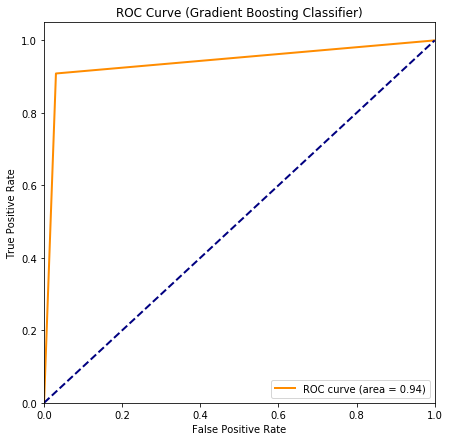

In [72]:
fpr = []
tpr = []
fpr, tpr, thresholds = roc_curve(y_test, gbc_pred)
auc = roc_auc_score(y_test, gbc_pred)

plt.figure(figsize = (7, 7))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = {0:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Gradient Boosting Classifier)')
plt.legend(loc="lower right")
plt.show()

DNN)

In [73]:
num_classes = 2
y_train_cat = np_utils.to_categorical(y_train, num_classes)
y_test_cat = np_utils.to_categorical(y_test, num_classes)

In [74]:
x_train_norm = np.array(X_train_norm)
x_test_norm = np.array(X_test_norm)
model = Sequential()
model.add(Dense(57, input_dim = 57, activation = 'relu'))
model.add(Dense(25, activation = 'elu'))
model.add(Dense(25, activation = 'elu'))
model.add(Dense(25, activation = 'elu'))
model.add(Dense(2, activation = 'sigmoid'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
early_stopping_monitor = EarlyStopping(patience=3)
result = model.fit(x_train_norm, y_train_cat, epochs = 100, 
                   validation_split = 0.15, callbacks=[early_stopping_monitor])

Train on 2932 samples, validate on 518 samples
Epoch 1/100
2932/2932 [==============================] - ETA: 17s - loss: 0.7389 - accuracy: 0.562 - ETA: 0s - loss: 0.5784 - accuracy: 0.771 - ETA: 0s - loss: 0.4588 - accuracy: 0.82 - ETA: 0s - loss: 0.4036 - accuracy: 0.85 - 0s 144us/step - loss: 0.3687 - accuracy: 0.8653 - val_loss: 0.2282 - val_accuracy: 0.9189
Epoch 2/100
2932/2932 [==============================] - ETA: 0s - loss: 0.1546 - accuracy: 0.96 - ETA: 0s - loss: 0.1887 - accuracy: 0.93 - ETA: 0s - loss: 0.1959 - accuracy: 0.93 - ETA: 0s - loss: 0.1932 - accuracy: 0.93 - 0s 61us/step - loss: 0.1918 - accuracy: 0.9332 - val_loss: 0.1803 - val_accuracy: 0.9363
Epoch 3/100
2932/2932 [==============================] - ETA: 0s - loss: 0.1194 - accuracy: 0.96 - ETA: 0s - loss: 0.1917 - accuracy: 0.92 - ETA: 0s - loss: 0.1684 - accuracy: 0.93 - ETA: 0s - loss: 0.1664 - accuracy: 0.93 - 0s 71us/step - loss: 0.1642 - accuracy: 0.9389 - val_loss: 0.1592 - val_accuracy: 0.9459
Epoch 4

In [75]:
dnn_pred = model.predict(X_test_norm)

dnn_class_pred = []
for arr in dnn_pred:
    if arr[0] < arr[1]:
        dnn_class_pred.append(1)
    else:
        dnn_class_pred.append(0)

In [76]:
print('accuracy')
print(accuracy_score(y_test, dnn_class_pred))
print('F1 Score')
print(f1_score(y_test, dnn_class_pred, average='weighted')) 

accuracy
0.9226759339704604
F1 Score
0.9220639950132816


In [77]:
dnn_cm = confusion_matrix(y_test, dnn_class_pred)
print('Confusion Matrix')
print(dnn_cm)
print('')
print('Misclassification Cost')
cost = (dnn_cm[1, 0] * 10) + (dnn_cm[0, 1] * 1)
print(cost)

Confusion Matrix
[[665  26]
 [ 63 397]]

Misclassification Cost
656


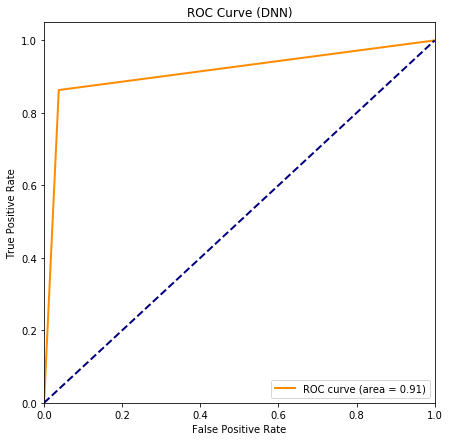

In [78]:
fpr = []
tpr = []
fpr, tpr, thresholds = roc_curve(y_test, dnn_class_pred)
auc = roc_auc_score(y_test, dnn_class_pred)

plt.figure(figsize = (7, 7))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = {0:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (DNN)')
plt.legend(loc="lower right")
plt.show()

SVM)

In [79]:
svm_hps = [{'kernel': ['rbf'], 'gamma': [1e-2,1e-3, 1e-4], 'C': [1, 10, 100]}]
svm_clf = SVC()
svm_grid = GridSearchCV(svm_clf, svm_hps, cv = 5, scoring = 'f1_weighted')

In [80]:
svm_pred = svm_grid.fit(X_train_norm, y_train).predict(X_test_norm)

In [81]:
print('accuracy')
print(accuracy_score(y_test, svm_pred))
print('F1 Score')
print(f1_score(y_test, svm_pred, average='weighted')) 

accuracy
0.9218071242397915
F1 Score
0.9214272627408802


In [82]:
svm_cm = confusion_matrix(y_test, svm_pred)
print('Confusion Matrix')
print(svm_cm)
print('')
print('Misclassification Cost')
cost = (svm_cm[1, 0] * 10) + (svm_cm[0, 1] * 1)
print(cost)

Confusion Matrix
[[658  33]
 [ 57 403]]

Misclassification Cost
603


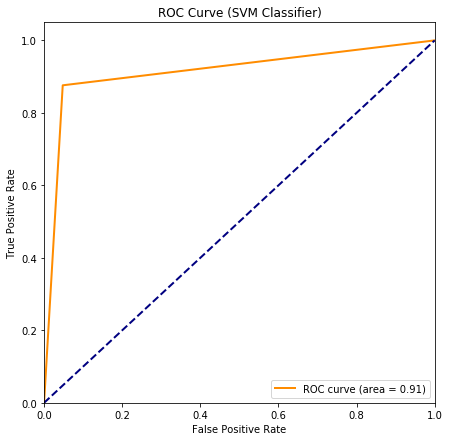

In [83]:
fpr = []
tpr = []
fpr, tpr, thresholds = roc_curve(y_test, svm_pred)
auc = roc_auc_score(y_test, svm_pred)

plt.figure(figsize = (7, 7))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = {0:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (SVM Classifier)')
plt.legend(loc="lower right")
plt.show()

Random Forest)

In [84]:
ranF_clf_hps = {'n_estimators':[50, 100, 150], 'max_depth':[5, 10], 
             'min_samples_leaf':[2, 4], 'min_samples_split':[4, 8]}

ranF_clf = ensemble.RandomForestClassifier()

ranF_clf_grid = GridSearchCV(ranF_clf, ranF_clf_hps, cv = 5, scoring = 'f1_weighted')

In [85]:
ranF_clf_pred = ranF_clf_grid.fit(X_train, y_train).predict(X_test)

In [86]:
print('accuracy')
print(accuracy_score(y_test, ranF_clf_pred))
print('F1 Score')
print(f1_score(y_test, ranF_clf_pred, average='weighted')) 

accuracy
0.9278887923544744
F1 Score
0.9271715063807371


In [87]:
ranF_clf_cm = confusion_matrix(y_test, ranF_clf_pred)
print('Confusion Matrix')
print(ranF_clf_cm)
print('')
print('Misclassification Cost')
cost = (ranF_clf_cm[1, 0] * 10) + (ranF_clf_cm[0, 1] * 1)
print(cost)

Confusion Matrix
[[672  19]
 [ 64 396]]

Misclassification Cost
659


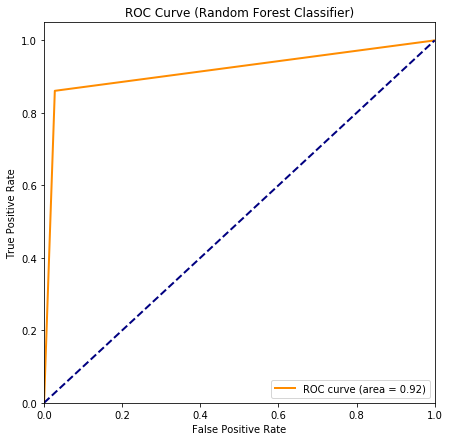

In [88]:
fpr = []
tpr = []
fpr, tpr, thresholds = roc_curve(y_test, ranF_clf_pred)
auc = roc_auc_score(y_test, ranF_clf_pred)

plt.figure(figsize = (7, 7))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = {0:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest Classifier)')
plt.legend(loc="lower right")
plt.show()

In [89]:
clf1 = neighbors.KNeighborsClassifier(n_neighbors = 10)
clf2 = linear_model.LogisticRegression()
clf3 = GaussianNB()
clf4 = tree.DecisionTreeClassifier()

stacked_clf = StackingClassifier(classifiers = [clf1, clf3, clf4], meta_classifier = clf2)

In [90]:
stacked_clf_pred = stacked_clf.fit(X_train, y_train).predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [91]:
print('accuracy')
print(accuracy_score(y_test, stacked_clf_pred))
print('F1 Score')
print(f1_score(y_test, stacked_clf_pred, average='weighted')) 

accuracy
0.9000868809730669
F1 Score
0.9000316553632997


In [92]:
stacked_clf_cm = confusion_matrix(y_test, stacked_clf_pred)
print('Confusion Matrix')
print(stacked_clf_cm)
print('')
print('Misclassification Cost')
cost = (stacked_clf_cm[1, 0] * 10) + (stacked_clf_cm[0, 1] * 1)
print(cost)

Confusion Matrix
[[635  56]
 [ 59 401]]

Misclassification Cost
646


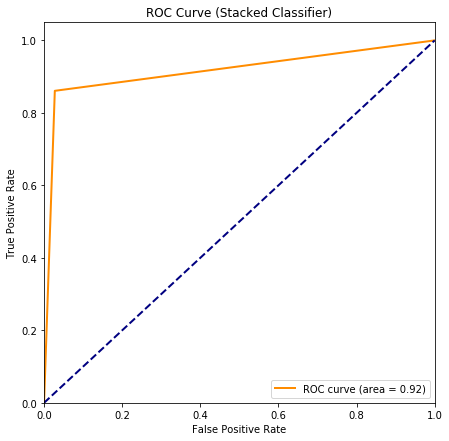

In [93]:
fpr = []
tpr = []
fpr, tpr, thresholds = roc_curve(y_test, ranF_clf_pred)
auc = roc_auc_score(y_test, ranF_clf_pred)

plt.figure(figsize = (7, 7))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = {0:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Stacked Classifier)')
plt.legend(loc="lower right")
plt.show()

### Final Model Recommendation

The top performing models were the Gradient Boosting and Random Forest Classifiers. Below is a side by side comparison of the two models and how they performed. SVM and DNN both were very close in performance.

In [94]:
print('Gradient Boosting Classifier Parameters')
print(gbc_grid.best_params_)
print('')
print('Random Forest Classifier Parameters')
print(ranF_clf_grid.best_params_)

Gradient Boosting Classifier Parameters
{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 3, 'n_estimators': 300}

Random Forest Classifier Parameters
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 50}


In [95]:
print('Overall Predictive Accuracy')
print('Gradient Boosting Classifier: {0:.3f}'.format(accuracy_score(y_test, gbc_pred)))
print('Random Forest Classifier: {0:.3f}'.format(accuracy_score(y_test, ranF_clf_pred)))

Overall Predictive Accuracy
Gradient Boosting Classifier: 0.945
Random Forest Classifier: 0.928


In [96]:
print('Misclassification Cost')
print('Gradient Boosting Classifier: {0:.3f}'.format((gbc_cm[1, 0] * 10) + (gbc_cm[0, 1] * 1)))
print('Random Forest Classifier: {0:.3f}'.format((ranF_clf_cm[1, 0] * 10) + (ranF_clf_cm[0, 1] * 1)))

Misclassification Cost
Gradient Boosting Classifier: 441.000
Random Forest Classifier: 659.000


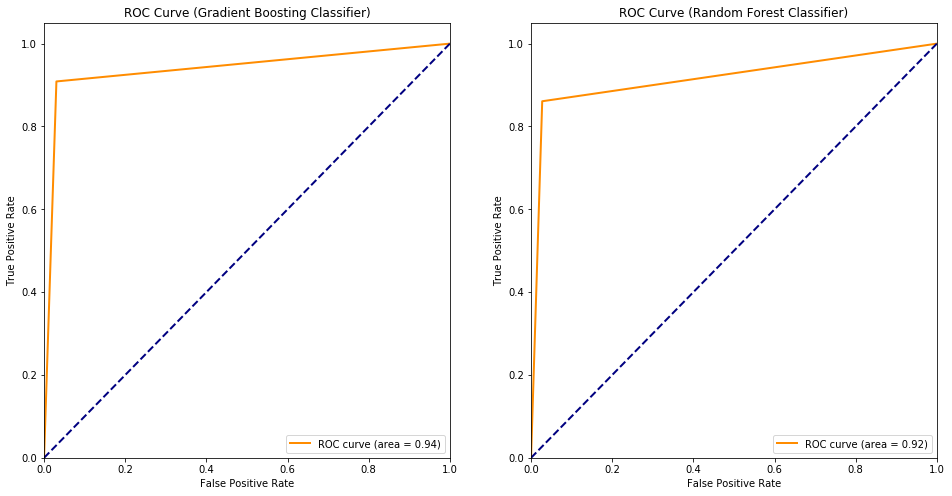

In [97]:
gbc_fpr = []
gbc_tpr = []
gbc_fpr, gbc_tpr, thresholds = roc_curve(y_test, gbc_pred)
gbc_auc = roc_auc_score(y_test, gbc_pred)

rfc_fpr = []
rfc_tpr = []
rfc_fpr, rfc_tpr, thresholds = roc_curve(y_test, ranF_clf_pred)
rfc_auc = roc_auc_score(y_test, ranF_clf_pred)

plt.figure(figsize = (16, 8))
plt.subplot(121)
lw = 2
plt.plot(gbc_fpr, gbc_tpr, color='darkorange',
         lw=lw, label='ROC curve (area = {0:.2f})'.format(gbc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Gradient Boosting Classifier)')
plt.legend(loc="lower right")

plt.subplot(122)
lw = 2
plt.plot(rfc_fpr, rfc_tpr, color='darkorange',
         lw=lw, label='ROC curve (area = {0:.2f})'.format(rfc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest Classifier)')
plt.legend(loc="lower right")
plt.show()

As it can be inferred from the above comparisons, the Gradient Boosting Classifier is the best suited model for this dataset in terms of overall predictive accuracy and misclassification cost.